## Objectives

- Assessing the accuracy of the coefficients 
- Understanding the confidence intervals of coefficients
- Understanding the accuracy of the model
- qq-plots

## The  Accuracy of the Coefficient Estimates

In [1]:
import matplotlib.pyplot as plt

import numpy as np

## use statsmodel to fit a line to the data
import statsmodels.api as sm


import seaborn as sns

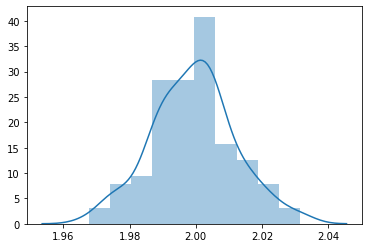

In [2]:
import pandas as pd
import numpy as np

intercepts = []
slopes = []
for i in range(100):

    X = np.linspace(0, 10, 100)

    y = 3 + 2*X + np.random.normal(0, 0.4, 100)

    sim = np.stack([X,y], axis=1)
    sim_df = pd.DataFrame(sim, columns= ['X', 'y'])

    X = sm.add_constant(X)

    model = sm.OLS(y,X, hasconst=True)

    res = model.fit()
    
    intercepts.append(res.params[0])
    slopes.append(res.params[1])
sns.distplot(slopes)

As we see above we can consider $\beta_{0}$ and $\beta_{1}$ as some sample statistics. Therefore we would like to understand how close are they to the true (population) parameters. To do this we find their confidence intervals:

<img src="confidence_intervals.png" cap="Confidence intervals"  width='550'/>

Then the confidence intervals will be given as 

$$ \big[\widehat{\beta}_{1} - 2\cdot SE(\widehat{\beta}_{1}), \quad \widehat{\beta}_{1} + 2 \cdot SE(\widehat{\beta}_{1})\big]$$

similarly for the intercept

$$ \big[\widehat{\beta}_{0} - 2\cdot SE(\widehat{\beta}_{0}),\quad \widehat{\beta}_{0} + 2 \cdot SE(\widehat{\beta}_{0})\big]$$


In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

car_crashes_df = sns.load_dataset('car_crashes')

df = car_crashes_df[['alcohol', 'total']]

df.head()

,alcohol,total
0,5.640,18.8
1,4.525,18.1
2,5.208,18.6
3,5.824,22.4
4,3.360,12.0


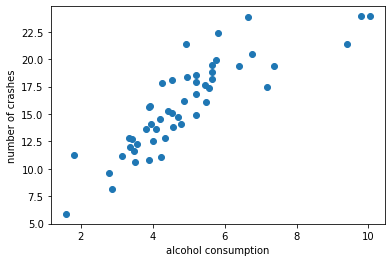

In [8]:
## let's plot df

plt.scatter(car_crashes_df['alcohol'], car_crashes_df['total'])

plt.xlabel('alcohol consumption')

plt.ylabel('number of crashes')
plt.show()

In [9]:
X = df.alcohol
y = df.total
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     130.5
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           2.04e-15
Time:                        10:47:02   Log-Likelihood:                -110.99
No. Observations:                  51   AIC:                             226.0
Df Residuals:                      49   BIC:                             229.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8578      0.921      6.357      0.0

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


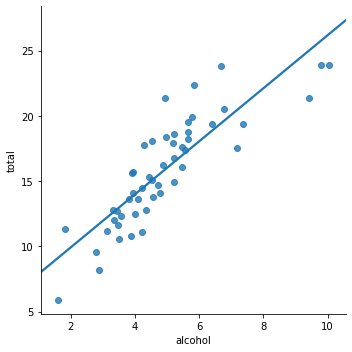

In [10]:
sns.lmplot(x = 'alcohol', y = 'total', data = df, ci = 0  );

## Assessing the Accuracy of the Model
When we assess the accuracy of the coefficients basically we check whether there is a real relationship between X and y. After we concluded that there is a significant relationship between variables it is natural to want to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed using the $R^{2}$ statistic. 

### $R^{2}$ statistic

Recall that we can find 'the best' line so that the _Residual Sum of Squares_ (RSS) is minimized:


<img src="rss.png" cap="RSS"  width='550'/>


We will assess the accuracy of the model by comparing this with the Total Sum of Squares (TSS):

$$ TSS = \sum (y_{i} - \bar{y}) $$


TSS measures the total variance in the response Y , and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression.



Hence, TSS − RSS measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^{2}$ measures the proportion of variability in Y that can be explained using X.

<img src="rsquared.png" cap="RSS"  width='250'/>


### Residuals and QQ-plots

In [11]:
X = df.alcohol
y = df.total
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     130.5
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           2.04e-15
Time:                        10:47:07   Log-Likelihood:                -110.99
No. Observations:                  51   AIC:                             226.0
Df Residuals:                      49   BIC:                             229.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8578      0.921      6.357      0.0

In [12]:
from scipy.stats import stats

In [13]:
residuals = res.resid

In [14]:
residuals

0     1.478888
1     3.045133
2     2.156931
3     4.704907
4    -0.686997
5     0.002440
6    -2.960161
7     0.464243
8    -3.195559
9     1.491484
10    1.815449
11   -2.941009
12    0.423993
13   -1.903244
14    0.095535
15    1.864637
16    3.259357
17    5.538228
18    0.892319
19    0.034970
20   -1.487801
21   -3.491069
22    0.217889
23   -1.916274
24    0.652869
25   -0.883716
26   -3.595856
27   -1.557297
28   -0.718686
29   -1.330898
30   -1.031716
31    2.444733
32   -0.807726
33    0.356931
34   -2.360074
35   -1.501611
36    2.312630
37    0.178043
38    0.874823
39   -3.330888
40   -1.874305
41    0.530118
42    2.148401
43   -1.441413
44    1.767452
45   -0.550402
46   -0.127240
47   -2.367483
48    4.397602
49   -1.313810
50    0.225229
dtype: float64

In [15]:
stats.normaltest(residuals)

NormaltestResult(statistic=1.9224833698353312, pvalue=0.38241774869995593)

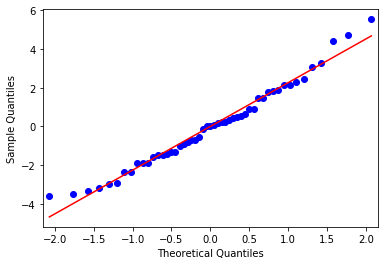

In [16]:
fig = sm.qqplot(residuals, line = 'r')
plt.show()

In [17]:
y_pred = res.predict(X)

In [18]:
sum(residuals <0 )

24

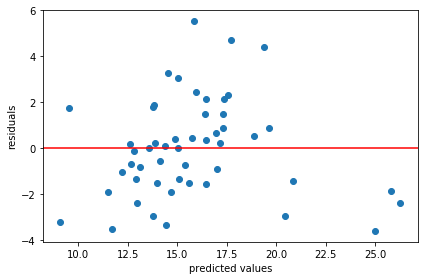

In [19]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()